In [48]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import mord

In [49]:
df = pd.read_csv('winequality-white.csv', delimiter=';')

In [50]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [51]:
df.quality.value_counts(sort=False)

4     163
8     175
5    1457
9       5
6    2198
3      20
7     880
Name: quality, dtype: int64

In [52]:
corr = df.corr()

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

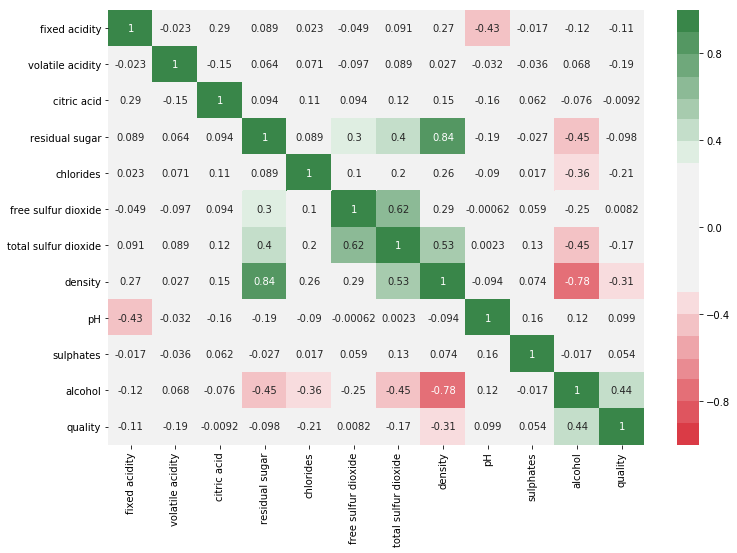

In [54]:
plt.figure(num=None, figsize=(12, 8))
sns.heatmap(corr, center=0, vmin=-1, vmax=1, cmap=sns.diverging_palette(10, 133, sep=80, n=20), annot=True)

In [55]:

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RandomizedLogisticRegression

from collections import Counter
import itertools

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [56]:
# load the iris datasets
y = df.quality
X = df.iloc[:, :-1]

# # Non-Stratified
# X_train, X_test, y_train, y_test = \
#     train_test_split(X, y, test_size=.3, random_state=1294)
# Stratified    
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=.7, random_state=1294)

In [57]:
clf = make_pipeline(StandardScaler(), mord.svm.SVC(C=1000, kernel='rbf', degree=1))
clf.fit(X_train, y_train)

print(clf)

# make predictions
clf_pred = clf.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, clf_pred))
print(metrics.confusion_matrix(y_test, clf_pred))

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        14
          4       0.18      0.24      0.20       114
          5       0.50      0.53      0.51      1020
          6       0.58      0.59      0.58      1539
          7       0.50      0.42      0.45       616
          8       0.37      0.33      0.34       123
          9       0.00      0.00      0.00         3

avg / total       0.52      0.52      0.51      3429

[[  0   4   6   2   2   0   0]
 [  0  27  51  30   6   0   0]
 [  1  66 542 359  49   3   0]
 [  0  45 391 903 171  29   0]
 [  0   6  81 235 256  37   1]
 [  0   3  15  3

In [98]:
# fit a logistic regression model to the data
lr1 = LogisticRegression(C=1e3)
lr1.fit(X_train, y_train)

print(lr1)

# make predictions
lr1_pred = lr1.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, lr1_pred))
print(metrics.confusion_matrix(y_test, lr1_pred))

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        14
          4       0.50      0.03      0.05       114
          5       0.57      0.50      0.53      1020
          6       0.51      0.78      0.62      1539
          7       0.54      0.15      0.24       616
          8       0.00      0.00      0.00       123
          9       0.00      0.00      0.00         3

avg / total       0.51      0.53      0.48      3429

[[   0    0    6    7    0    0    1]
 [   0    3   67   42    2    0    0]
 [   0    2  513  502    3    0    0]
 [   0    1  292 1199   47    0    0]
 [   0    0   24  499   93    0    0]
 [   0    0    0   96   27    0    0]
 [   0    0    0    2   

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
# fit a logistic regression model to the data
clf2 = mord.LogisticIT(alpha=100)

In [106]:
clf2.(X_train, y_train)

LogisticAT(alpha=100, max_iter=1000, verbose=0)

In [111]:
pred_prob = clf.predict_proba(X_test)
pred = clf.predict(X_test)

In [118]:
pred_prob[0:5, :]

array([[  1.21616493e-05,   1.35542131e-05,   3.34889804e-02,
          9.67879870e-03,   9.56751537e-01,   4.80967929e-05,
          6.87095867e-06],
       [  4.25455119e-05,   1.19302153e-06,   1.00719115e-01,
          5.45041850e-01,   3.54170488e-01,   7.74253147e-07,
          2.40350587e-05],
       [  1.10216789e-04,   3.15849684e-04,   1.03383574e-01,
          3.48797835e-01,   5.47292585e-01,   3.76746850e-05,
          6.22643111e-05],
       [  3.00713550e-05,   5.81037097e-06,   3.68099376e-03,
          5.24914714e-01,   4.71330706e-01,   2.07161930e-05,
          1.69880852e-05],
       [  7.35565850e-05,   1.64079385e-05,   1.31234112e-01,
          8.61819068e-01,   6.81304219e-03,   2.05399579e-06,
          4.17600258e-05]])

In [119]:
pred[0:5]

array([7, 6, 7, 6, 6])

In [104]:
print(clf2)

# make predictions
clf2_pred = clf2.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, clf2_pred))
print(metrics.confusion_matrix(y_test, clf2_pred))

LogisticSE(alpha=1e-06, max_iter=100000, verbose=0)
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        14
          4       0.44      0.04      0.07       114
          5       0.59      0.43      0.49      1020
          6       0.51      0.78      0.62      1539
          7       0.45      0.26      0.33       616
          8       0.00      0.00      0.00       123
          9       0.00      0.00      0.00         3

avg / total       0.50      0.52      0.49      3429

[[   0    1    4    8    1    0    0]
 [   0    4   66   42    2    0    0]
 [   0    3  437  566   14    0    0]
 [   0    1  211 1193  134    0    0]
 [   0    0   29  428  158    1    0]
 [   0    0    0   82   41    0    0]
 [   0    0    0    3    0    0    0]]


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [102]:
# fit a logistic regression model to the data
lr1 = LogisticRegression(C=1e3, class_weight='balanced')
lr1.fit(X_train, y_train)

print(lr1)

# make predictions
lr1_pred = lr1.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, lr1_pred))
print(metrics.confusion_matrix(y_test, lr1_pred))

LogisticRegression(C=100.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
             precision    recall  f1-score   support

          3       0.01      0.14      0.02        14
          4       0.18      0.43      0.26       114
          5       0.52      0.55      0.53      1020
          6       0.56      0.43      0.49      1539
          7       0.39      0.41      0.40       616
          8       0.11      0.07      0.08       123
          9       0.00      0.00      0.00         3

avg / total       0.49      0.45      0.46      3429

[[  2   4   2   2   1   0   3]
 [  3  49  42  12   7   1   0]
 [ 43 110 560 262  39   4   2]
 [ 68  89 391 659 296  26  10]
 [ 25  14  80 203 250  33  11]
 [  9   3  12  32  54   8   5]
 [  1   0   0   0   2   0   0]]


In [88]:
# fit a logistic regression model to the data
# lr2 = LogisticRegression(C=1000)
lr2 = LogisticRegression(solver='newton-cg', 
                         multi_class='multinomial',
                         class_weight='balanced',
                         C=1000)
lr2.fit(X_train, y_train)

print(lr2)

# make predictions
lr2_pred = lr2.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, lr2_pred))
print(metrics.confusion_matrix(y_test, lr2_pred))

LogisticRegression(C=1000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)
             precision    recall  f1-score   support

          3       0.01      0.14      0.02        14
          4       0.15      0.57      0.24       114
          5       0.51      0.51      0.51      1020
          6       0.59      0.26      0.36      1539
          7       0.32      0.29      0.31       616
          8       0.10      0.42      0.16       123
          9       0.00      0.00      0.00         3

avg / total       0.48      0.35      0.38      3429

[[  2   4   1   2   1   1   3]
 [  3  65  28   4   9   5   0]
 [ 54 196 518 168  55  28   1]
 [ 91 139 385 398 288 232   6]
 [ 38  21  79  95 181 196   6]
 [ 17   6  12   6  26  52   4]
 [  1   0   0   0   2   0   0]]


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [75]:
knn1 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
knn1.fit(X_train, y_train)

knn1_pred = knn1.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, knn1_pred))
print(metrics.confusion_matrix(y_test, knn1_pred))

             precision    recall  f1-score   support

          3       0.20      0.07      0.11        14
          4       0.24      0.18      0.21       114
          5       0.53      0.51      0.52      1020
          6       0.56      0.59      0.58      1539
          7       0.46      0.44      0.45       616
          8       0.31      0.31      0.31       123
          9       0.00      0.00      0.00         3

avg / total       0.51      0.52      0.51      3429

[[  1   1   4   6   1   1   0]
 [  1  21  53  30   8   1   0]
 [  3  34 521 387  64  11   0]
 [  0  25 358 915 210  31   0]
 [  0   4  42 254 273  42   1]
 [  0   1   8  44  32  38   0]
 [  0   0   0   2   1   0   0]]


In [62]:
knn1

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'))])

In [63]:
lsvm = make_pipeline(StandardScaler(), LinearSVC(class_weight='balanced'))
lsvm.fit(X_train, y_train)

lsvm_pred = lsvm.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, lsvm_pred))
print(metrics.confusion_matrix(y_test, lsvm_pred))

             precision    recall  f1-score   support

          3       0.01      0.14      0.03        14
          4       0.16      0.45      0.24       114
          5       0.51      0.57      0.54      1020
          6       0.57      0.34      0.43      1539
          7       0.39      0.50      0.44       616
          8       0.16      0.10      0.12       123
          9       0.00      0.00      0.00         3

avg / total       0.49      0.43      0.44      3429

[[  2   5   2   2   1   1   1]
 [  3  51  43   7  10   0   0]
 [ 37 124 585 220  49   4   1]
 [ 65 118 432 522 369  28   5]
 [ 19  19  81 139 308  32  18]
 [  8   3  13  20  60  12   7]
 [  1   0   0   0   2   0   0]]


In [64]:
rbfsvm = make_pipeline(StandardScaler(), SVC(C=1000, kernel='rbf', class_weight='balanced'))
rbfsvm.fit(X_train, y_train)

svm_rbf_pred = rbfsvm.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, svm_rbf_pred))
print(metrics.confusion_matrix(y_test, svm_rbf_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00        14
          4       0.18      0.23      0.20       114
          5       0.52      0.54      0.53      1020
          6       0.59      0.59      0.59      1539
          7       0.50      0.45      0.47       616
          8       0.37      0.33      0.35       123
          9       0.00      0.00      0.00         3

avg / total       0.53      0.53      0.53      3429

[[  0   4   7   1   2   0   0]
 [  0  26  53  28   7   0   0]
 [  1  62 555 359  40   3   0]
 [  0  41 364 912 193  29   0]
 [  0   5  78 218 278  36   1]
 [  0   5  13  32  33  40   0]
 [  0   0   0   0   3   0   0]]


In [65]:
from sklearn.naive_bayes import GaussianNB

In [77]:
# nb1 = make_pipeline(StandardScaler(), GaussianNB())
nb1 = GaussianNB() #priors=[0.2, 0.15, 0.1, 0.1, 0.1, 0.15, 0.2])
nb1.fit(X_train, y_train)
nb1_pred = nb1.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, nb1_pred))
print(metrics.confusion_matrix(y_test, nb1_pred))

             precision    recall  f1-score   support

          3       0.07      0.14      0.09        14
          4       0.18      0.20      0.19       114
          5       0.51      0.58      0.54      1020
          6       0.53      0.30      0.38      1539
          7       0.33      0.66      0.44       616
          8       0.25      0.03      0.06       123
          9       0.00      0.00      0.00         3

avg / total       0.46      0.43      0.42      3429

[[  2   3   4   2   3   0   0]
 [  2  23  52  16  21   0   0]
 [ 16  56 588 236 124   0   0]
 [ 10  36 434 460 597   2   0]
 [  0   5  72 125 404  10   0]
 [  0   3  13  24  79   4   0]
 [  0   0   1   0   2   0   0]]


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
rf1 = RandomForestClassifier(n_estimators=1000, random_state=1294, class_weight='balanced')
rf1.fit(X_train, y_train)
rf1_pred = rf1.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, rf1_pred))
print(metrics.confusion_matrix(y_test, rf1_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00        14
          4       0.50      0.11      0.19       114
          5       0.65      0.57      0.61      1020
          6       0.58      0.79      0.67      1539
          7       0.66      0.40      0.50       616
          8       0.91      0.24      0.37       123
          9       0.00      0.00      0.00         3

avg / total       0.62      0.61      0.59      3429

[[   0    0    5    9    0    0    0]
 [   0   13   65   35    1    0    0]
 [   0   11  586  415    8    0    0]
 [   0    2  233 1218   86    0    0]
 [   0    0   14  355  244    3    0]
 [   0    0    1   65   28   29    0]
 [   0    0    0    2    1    0    0]]


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
clf2 = ExtraTreesClassifier(n_estimators=1000, random_state=1294, class_weight='balanced')
clf2.fit(X_train, y_train)
predicted = clf2.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00        14
          4       0.54      0.12      0.20       114
          5       0.65      0.58      0.61      1020
          6       0.58      0.79      0.67      1539
          7       0.64      0.38      0.48       616
          8       0.88      0.24      0.38       123
          9       0.00      0.00      0.00         3

avg / total       0.62      0.61      0.59      3429

[[   0    0    5    9    0    0    0]
 [   0   14   61   38    1    0    0]
 [   0    9  592  407   12    0    0]
 [   0    3  238 1210   87    1    0]
 [   0    0   17  359  237    3    0]
 [   0    0    1   61   31   30    0]
 [   0    0    0    2    1    0    0]]


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
clf = GradientBoostingClassifier(n_estimators=1000, random_state=1294)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

             precision    recall  f1-score   support

          3       0.13      0.21      0.16        14
          4       0.34      0.18      0.23       114
          5       0.59      0.54      0.56      1020
          6       0.57      0.68      0.62      1539
          7       0.52      0.46      0.49       616
          8       0.59      0.26      0.36       123
          9       0.00      0.00      0.00         3

avg / total       0.56      0.56      0.56      3429

[[   3    2    4    5    0    0    0]
 [   3   20   52   31    8    0    0]
 [  10   26  546  406   31    0    1]
 [   5    9  274 1049  190   12    0]
 [   2    1   40  279  284   10    0]
 [   0    0    4   54   33   32    0]
 [   0    0    0    2    1    0    0]]
